In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from tqdm import tqdm

from FRM import AutoEncoder
from feature_dataset import CustomFeatureDataset
from Swin3d import Swin3D_fine_tune


In [2]:
model = Swin3D_fine_tune(n_classes=7)
model = torch.load('checkpoints/Swin3d_classifier_all_weights/checkpoint_49.pt',weights_only=False)
model.classifier = nn.Identity()

In [3]:
frm_model = AutoEncoder(num_encoder_layers=1, num_decoder_layers=1, bottleneck_dim=32, dropout_prob=0.1).cuda()
optimizer = optim.AdamW(frm_model.parameters(), lr= 1e-3, weight_decay=0.1)
criterion = nn.L1Loss()

In [4]:
dataset = CustomFeatureDataset('annotated_toledo_dataset.pkl')
train_size = int(0.85 * len(dataset))
val_size = int(0.05 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=multiprocessing.cpu_count() // 2,
    pin_memory=True,
    persistent_workers=True
)

val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=multiprocessing.cpu_count() // 2,
    pin_memory=True,
    persistent_workers=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=multiprocessing.cpu_count() // 2,
    pin_memory=True,
    persistent_workers=True
)

In [5]:
num_epochs = 20

train_losses = []
val_losses = []

for epoch in range(num_epochs):

    # -------------- Train --------------------
    frm_model.train()
    train_loss = 0.0
    
    for feature_vector, _, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        
        feature_vector = feature_vector.squeeze(dim=1)

        feature_vector = feature_vector.cuda()
        optimizer.zero_grad()

        output = frm_model(feature_vector)
        loss = criterion(feature_vector,output)

        loss.backward()
        optimizer.step()

        
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # ------------------- Val --------------------------------
    frm_model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for feature_vector, _, _ in val_loader:
            
            feature_vector = feature_vector.squeeze(dim=1)
            feature_vector = feature_vector.cuda()

            output = frm_model(feature_vector)
            loss = criterion(feature_vector, output)

            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")

Epoch 1/20: 100%|██████████| 69/69 [00:00<00:00, 212.20it/s]


Epoch 1/20 - Train Loss: 0.5767 - Val Loss: 0.4486


Epoch 2/20: 100%|██████████| 69/69 [00:00<00:00, 1440.14it/s]


Epoch 2/20 - Train Loss: 0.4323 - Val Loss: 0.3780


Epoch 3/20: 100%|██████████| 69/69 [00:00<00:00, 1091.63it/s]


Epoch 3/20 - Train Loss: 0.3863 - Val Loss: 0.3531


Epoch 4/20: 100%|██████████| 69/69 [00:00<00:00, 1152.46it/s]


Epoch 4/20 - Train Loss: 0.3617 - Val Loss: 0.3300


Epoch 5/20: 100%|██████████| 69/69 [00:00<00:00, 1334.95it/s]


Epoch 5/20 - Train Loss: 0.3453 - Val Loss: 0.3170


Epoch 6/20: 100%|██████████| 69/69 [00:00<00:00, 1341.15it/s]


Epoch 6/20 - Train Loss: 0.3346 - Val Loss: 0.3055


Epoch 7/20: 100%|██████████| 69/69 [00:00<00:00, 1267.08it/s]


Epoch 7/20 - Train Loss: 0.3247 - Val Loss: 0.2981


Epoch 8/20: 100%|██████████| 69/69 [00:00<00:00, 1232.52it/s]


Epoch 8/20 - Train Loss: 0.3162 - Val Loss: 0.2897


Epoch 9/20: 100%|██████████| 69/69 [00:00<00:00, 1219.78it/s]


Epoch 9/20 - Train Loss: 0.3094 - Val Loss: 0.2840


Epoch 10/20: 100%|██████████| 69/69 [00:00<00:00, 1290.05it/s]


Epoch 10/20 - Train Loss: 0.3029 - Val Loss: 0.2786


Epoch 11/20: 100%|██████████| 69/69 [00:00<00:00, 1256.31it/s]


Epoch 11/20 - Train Loss: 0.2980 - Val Loss: 0.2738


Epoch 12/20: 100%|██████████| 69/69 [00:00<00:00, 1271.15it/s]


Epoch 12/20 - Train Loss: 0.2934 - Val Loss: 0.2715


Epoch 13/20: 100%|██████████| 69/69 [00:00<00:00, 1260.94it/s]


Epoch 13/20 - Train Loss: 0.2883 - Val Loss: 0.2662


Epoch 14/20: 100%|██████████| 69/69 [00:00<00:00, 1290.09it/s]


Epoch 14/20 - Train Loss: 0.2869 - Val Loss: 0.2650


Epoch 15/20: 100%|██████████| 69/69 [00:00<00:00, 1370.01it/s]


Epoch 15/20 - Train Loss: 0.2835 - Val Loss: 0.2606


Epoch 16/20: 100%|██████████| 69/69 [00:00<00:00, 1390.27it/s]


Epoch 16/20 - Train Loss: 0.2816 - Val Loss: 0.2587


Epoch 17/20: 100%|██████████| 69/69 [00:00<00:00, 1361.75it/s]


Epoch 17/20 - Train Loss: 0.2808 - Val Loss: 0.2549


Epoch 18/20: 100%|██████████| 69/69 [00:00<00:00, 1173.86it/s]


Epoch 18/20 - Train Loss: 0.2783 - Val Loss: 0.2543


Epoch 19/20: 100%|██████████| 69/69 [00:00<00:00, 1480.54it/s]


Epoch 19/20 - Train Loss: 0.2752 - Val Loss: 0.2532


Epoch 20/20: 100%|██████████| 69/69 [00:00<00:00, 1318.09it/s]

Epoch 20/20 - Train Loss: 0.2729 - Val Loss: 0.2511


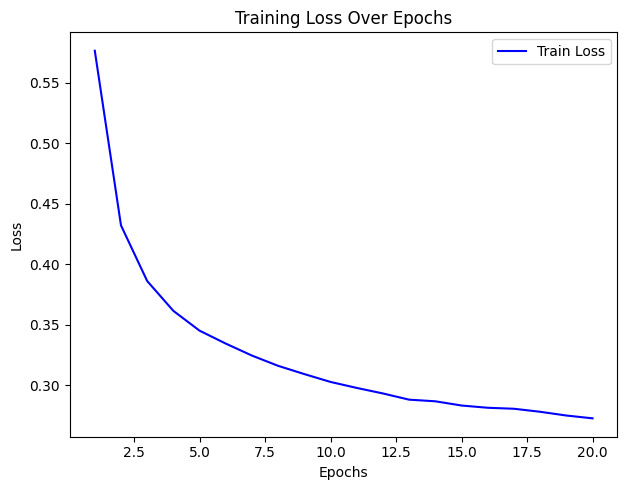

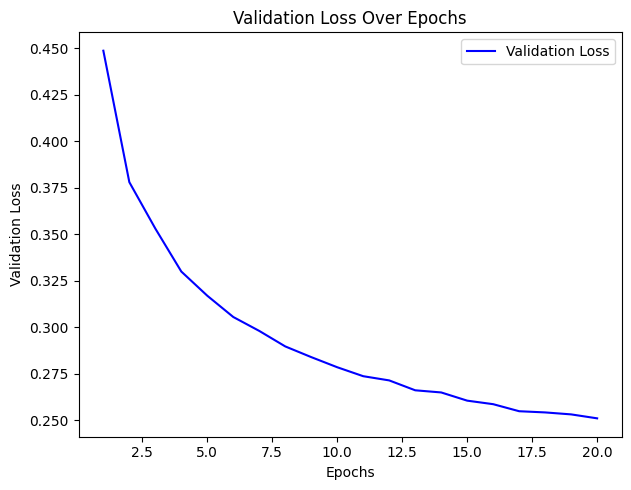

In [6]:
def plot_metrics(train_losses):
    # Convert all elements to CPU floats if they are tensors
    train_losses = [t.cpu().item() if hasattr(t, 'device') else t for t in train_losses]

    epochs = range(1, len(train_losses) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()

    plt.tight_layout()
    
    plt.show()
    
    # Plot Val
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, val_losses, label='Validation Loss', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example call after training
plot_metrics(train_losses)

In [7]:
print(f'Last training loss: {train_losses[-1]}')
print(f'Last validation loss: {val_losses[-1]}')
#print(f'Last lr: {scheduler.get_last_lr()}')

Last training loss: 0.27285869484362396
Last validation loss: 0.25112397968769073


In [8]:
test_epochs = 1
test_losses = []

for epoch in range(test_epochs):
    
    frm_model.eval()  # Set model to evaluation mode
    test_loss = 0.0

    with torch.no_grad():  # No gradient computation
        for feature_vector, _, _ in tqdm(test_loader, desc="Testing"):
            feature_vector = feature_vector.squeeze(dim=1)
            feature_vector = feature_vector.cuda()
            
            output = frm_model(feature_vector)
            loss = criterion(feature_vector, output)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f"Test Loss: {test_loss:.4f}")

Testing: 100%|██████████| 9/9 [00:00<00:00, 84.07it/s]

Test Loss: 0.2555


# Settle Threshold

In [9]:
frm_model.eval()
reconstruction_errors = []

with torch.no_grad():
    for feature_vector, _, _ in tqdm(val_loader, desc="Computing reconstruction errors"):
        
        # Prepare inputs
        feature_vector = feature_vector.squeeze(dim=1).cuda()

        # Forward pass
        output = frm_model(feature_vector)
        
        # Compute L1 reconstruction error per sample using your existing criterion
        # criterion gives a scalar loss if inputs are batched — so compute per sample manually
        errors = torch.mean(torch.abs(feature_vector - output), dim=1)  # L1 per sample

        reconstruction_errors.extend(errors.cpu().numpy())

# Convert to numpy
reconstruction_errors = np.array(reconstruction_errors)

Computing reconstruction errors: 100%|██████████| 5/5 [00:00<00:00, 1039.27it/s]


✅ 95th percentile threshold: 0.335049


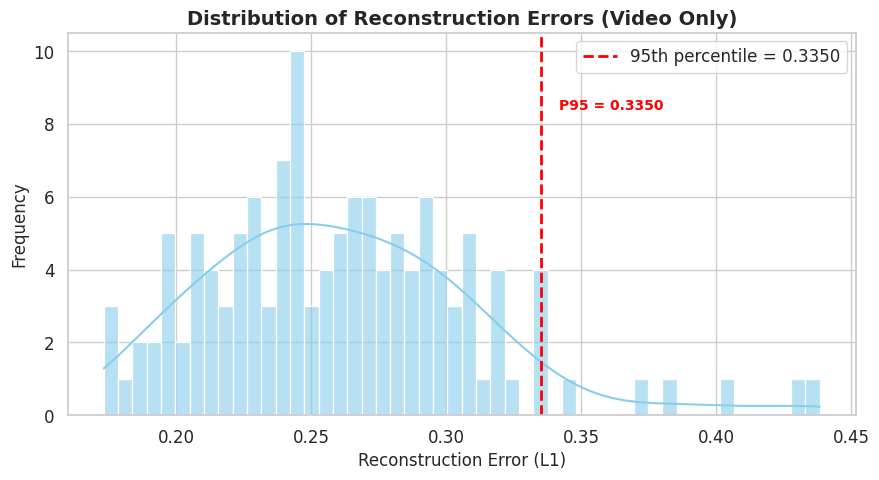

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Compute threshold based on 95th percentile only ---
threshold_95 = np.percentile(reconstruction_errors, 95)

print(f"✅ 95th percentile threshold: {threshold_95:.6f}")

# --- Plot ---
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(9, 5))

sns.histplot(reconstruction_errors, bins=50, kde=True, color='skyblue', alpha=0.6)

# Draw line for the 95th percentile
plt.axvline(threshold_95, color='red', linestyle='--', linewidth=2, label=f'95th percentile = {threshold_95:.4f}')

# Annotate
plt.text(threshold_95 * 1.02, plt.ylim()[1] * 0.8,
         f"P95 = {threshold_95:.4f}",
         color='red', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("Reconstruction Error (L1)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Reconstruction Errors (Video Only)", fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()